# ДЗ 10

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### Задача
`Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов.
Даны значения роста в трех группах случайно выбранных спортсменов:`  
`Футболисты: 173, 175, 180, 178, 177, 185, 183, 182`  
`Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180`  
`Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170`

In [2]:
Y = (
    np.array([173, 175, 180, 178, 177, 185, 183, 182]),
    np.array([177, 179, 180, 188, 177, 172, 171, 184, 180]),
    np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])
)

PROFS = (
    "Футболисты",
    "Хоккеисты",
    "Штангисты"
)

ALPHA = 0.05

k = len(Y) # кол. уровней фактора
n = sum(len(y) for y in Y) # общее кол. данных

In [5]:
[stats.shapiro(y) for y in Y] # проверка на нормальность

[ShapiroResult(statistic=0.9775082468986511, pvalue=0.9495404362678528),
 ShapiroResult(statistic=0.9579196572303772, pvalue=0.7763139009475708),
 ShapiroResult(statistic=0.9386808276176453, pvalue=0.5051165223121643)]

**Вывод:** Распределения нормальны.

In [6]:
stats.bartlett(*Y) # Проверка на равенство дисперсий

BartlettResult(statistic=0.4640521043406442, pvalue=0.7929254656083131)

**Вывод:** Различие дисперсий не носит статистически значимого характера. Выполняем параметрический тест.

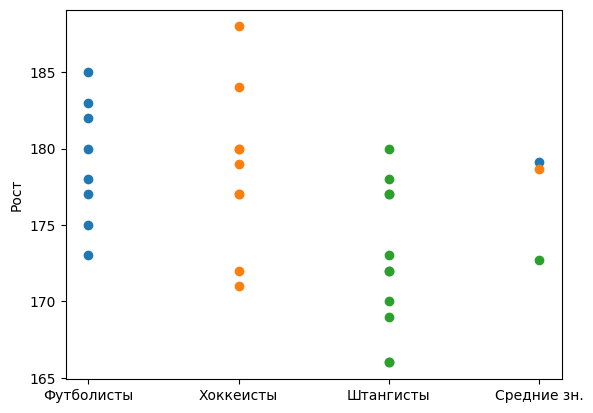

In [5]:
fig, ax = plt.subplots()
ax.set_xticks(np.arange(k + 1))
ax.set_xticklabels(PROFS + ("Средние зн.",))
plt.ylabel("Рост")

for i, y in enumerate(Y):
    plt.scatter(np.append(np.repeat(i, len(y)), k), np.append(y, np.mean(y)))

plt.show()

In [11]:
mComm = np.mean(np.hstack(Y)) # общее среднее
sFact_sq = sum((np.mean(y) - mComm)**2 * len(y) for y in Y) # сумма квадратов отклонений средних значений уровней # type: ignore
sRem_sq = sum(sum((y - np.mean(y))**2) for y in Y) # сумма квадратов отклонений по уровням (остаточных)

dFact = sFact_sq / (k - 1) # факторная дисперсия
dRem = sRem_sq / (n - k) # остаточная дисперсия

f = dFact / dRem # критерий Фишера
f_cr = stats.f.ppf(1 - ALPHA, dfn=(k - 1), dfd=(n - k)) # крит. значение для критерия Фишера
f, f_cr

(5.500053450812599, 3.3851899614491683)

Т.к. наблюдаемое значение критерия > критического, принимается альтернативная гипотеза - фактор влияет на величину.

In [8]:
stats.f_oneway(*Y)

F_onewayResult(statistic=5.500053450812596, pvalue=0.010482206918698693)

In [8]:
df = pd.DataFrame({
    'score': np.hstack(Y),
    'group': np.hstack([np.repeat(PROFS[i], repeats=len(y)) for i, y in enumerate(Y)])
})

print(pairwise_tukeyhsd(df['score'], df['group'], alpha=ALPHA))

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2  meandiff p-adj   lower    upper  reject
------------------------------------------------------------
Футболисты Хоккеисты  -0.4583  0.979  -6.2732  5.3566  False
Футболисты Штангисты  -6.3977 0.0219 -11.9583 -0.8372   True
 Хоккеисты Штангисты  -5.9394 0.0284 -11.3181 -0.5607   True
------------------------------------------------------------


**Вывод:** Средний рост зависит от вида спорта. Однако между футболистами и хоккеистами статистических различий в росте нет.

In [9]:
# from functools import reduce
# reduce(lambda acc, el: np.append(acc, np.repeat(el[1], len(Y[el[0]]))), enumerate(PROFS), np.array([]))